In [1]:
import numpy as np
import pickle as pl
import matplotlib.pyplot as plt

In [2]:
with open('traces_v1.3.pkl','rb') as f:
    chain = pl.load(f)

In [3]:
walk_indices = []
for iw,walk in enumerate(chain):
    print(f'walker {iw}')
    fail_cond = False
    for ip in [0,1,2,3]:
        print(f'    parameter {ip}')
        print(f'        mean = {np.mean(walk[:,ip].flatten()):5.5}')
        print(f'        std = {np.std(walk[:,ip].flatten()):5.5}')
        fail_cond = fail_cond or (np.std(walk[:,ip].flatten())<0.000001)
        if fail_cond:
            print('REMOVING THIS WALKER')
            break
    if fail_cond:
        continue
    else:
        walk_indices.append(iw)
        
warmup = 500
chain_cleaned = np.array(chain[walk_indices,warmup:,:])


walker 0
    parameter 0
        mean = 5.3731
        std = 4.8801
    parameter 1
        mean = -1.9249
        std = 4.8865
    parameter 2
        mean = 1.2185
        std = 4.8621
    parameter 3
        mean = -0.048677
        std = 4.8717
walker 1
    parameter 0
        mean = 5.1834
        std = 5.1841
    parameter 1
        mean = -2.1521
        std = 5.0221
    parameter 2
        mean = 0.86651
        std = 4.8383
    parameter 3
        mean = -0.37597
        std = 4.8343
walker 2
    parameter 0
        mean = 5.102
        std = 4.8572
    parameter 1
        mean = -2.357
        std = 5.0311
    parameter 2
        mean = 0.89845
        std = 4.923
    parameter 3
        mean = -0.19952
        std = 4.8666
walker 3
    parameter 0
        mean = 4.3664
        std = 4.7056
    parameter 1
        mean = -2.951
        std = 4.7121
    parameter 2
        mean = 0.23186
        std = 4.7138
    parameter 3
        mean = -1.0132
        std = 4.7216
walker 4


In [4]:
chain_cleaned.shape

(28, 15500, 4)

In [6]:
X = chain_cleaned.reshape(-1,4)
u,s,vh = np.linalg.svd(X[:10000,:])

In [7]:
vh

array([[-0.65168151, -0.37483811, -0.48995882, -0.44130256],
       [ 0.66807298, -0.66431219, -0.0893633 , -0.32308207],
       [ 0.31109591,  0.64660951, -0.38669728, -0.57929326],
       [ 0.17946878, -0.00904684, -0.77615705,  0.60439171]])

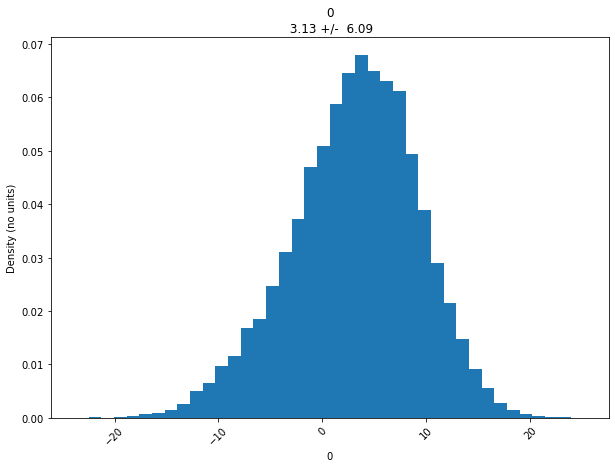

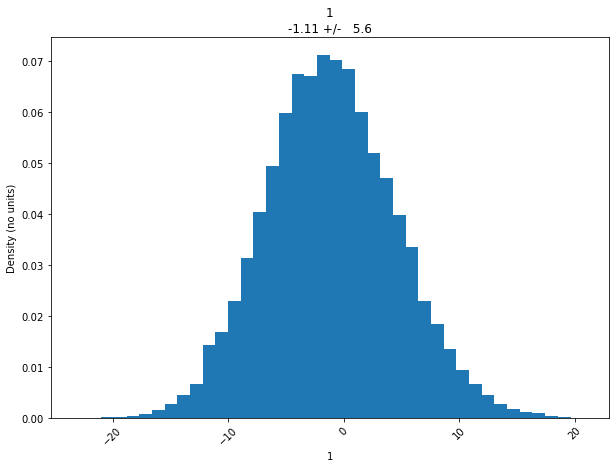

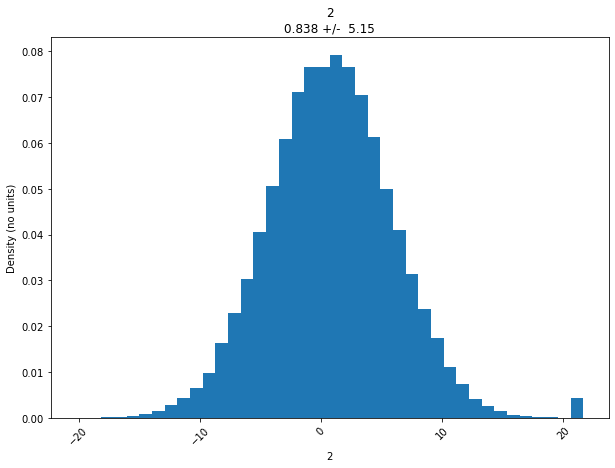

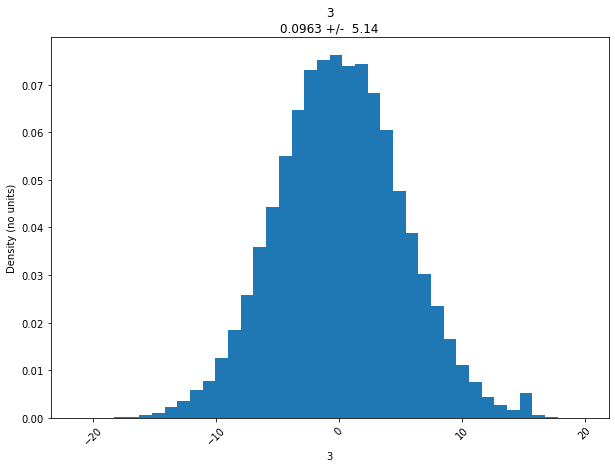

In [8]:
def make_hist(data,title_string,label):
    y = data.flatten()
    n_bins = 40
    plt.figure(figsize=(10,7))
    plt.hist(y,bins=n_bins,density=True)
    y_mean = np.mean(y)
    y_std = np.std(y)
    plt.title(f"{title_string}\n{y_mean:5.3} +/- {y_std:5.3}")
    plt.xlabel(label)
    plt.ylabel('Density (no units)')
    plt.xticks(rotation=45)
    plt.show()


for i in range(4):
    y = chain_cleaned[:,:,i].flatten()
    make_hist(y,str(i),str(i))

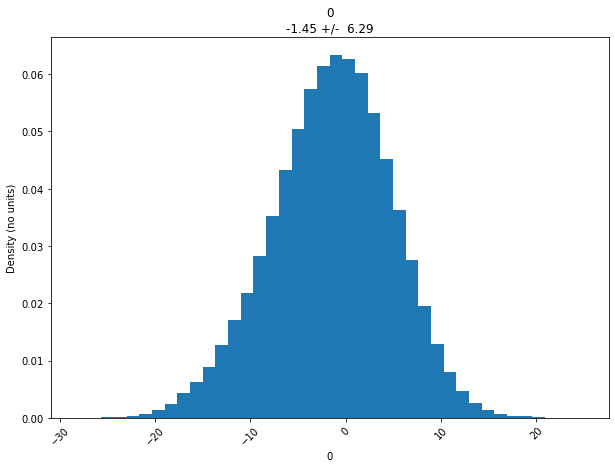

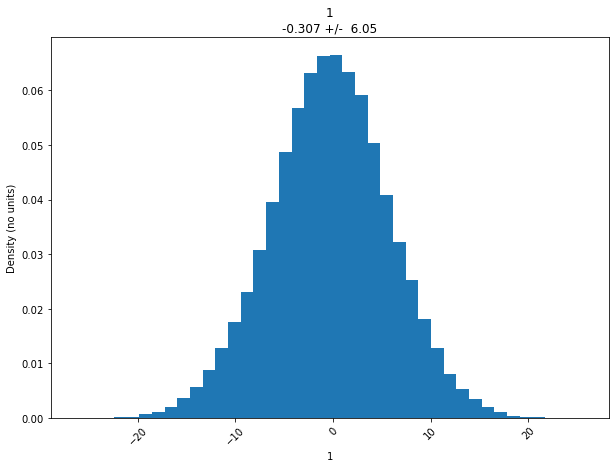

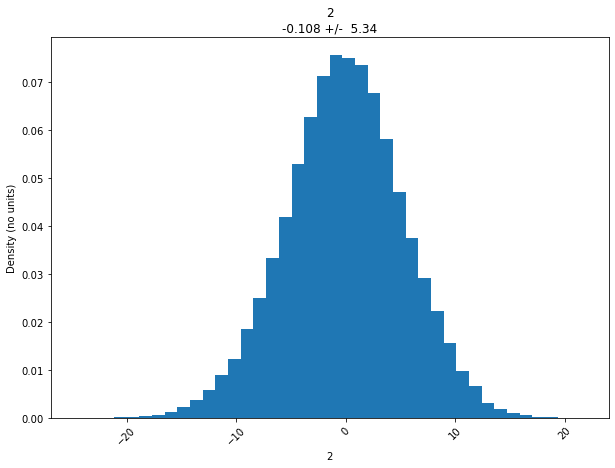

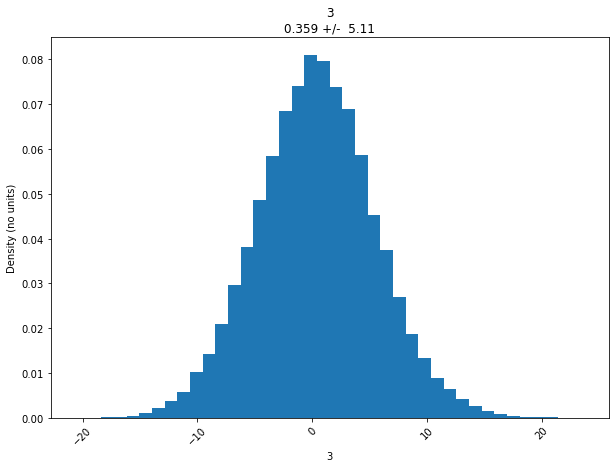

In [10]:
X = vh @ chain_cleaned.reshape(4,-1)
for i in range(4):
    y = X[i]
    make_hist(y,str(i),str(i))